In BVV.mlx, bias and variance trade-offs has been demonstrated. However, to estimate bias, one needs the "unknown" function  which is impractical. For real world applications, the bias and variance trade-offs are mitigated using heuristics. One such an approach is the m-way cross validation we have discussed in the function approximation lecture. 

Let $d(x) = sin(5\pi x / 2) - 2x^2 + 1$ for $-1 \leq x \leq 1
$

$y_i = d(x_i) + \epsilon_i$ where $\epsilon_i$ ~ $N(0,0.01)$

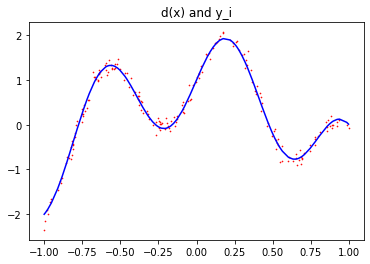

In [2]:
import numpy as np
import matplotlib.pyplot as plt

K = 200
xi = np.sort(2*np.random.rand(K) - 1)             #uniformly distributed random samples, x_i < x_i+1
dx = np.sin(5*np.pi*xi/2) - 2*np.square(xi) + 1
yi = dx + np.random.randn(K)*0.1                 #noise is N(0,0.01).

plt.plot(xi,dx,c='blue')
plt.scatter(xi,yi,c='red',s=.4)
plt.title('d(x) and y_i')
plt.show()

Now, we consider a 10-way cross validation that partitions the indices 1:200 into interleaved 10 non-overlapping subset: $Iv(m), 1 \leq m \leq 10$. The training set $Ir(m)$ will be the set difference between [1:200] and $Iv(m)$. 

---



In [9]:
Iv = [[]] * 10
Ir = [[]] * 10
for m in range(10):
  Iv[m] = range(m,K,10) # Indices of 10 validation sets.
  Ir[m] = np.setdiff1d(range(K),Iv[m])

Next, a polynomail approximation of $d(x)$ will be performed with 10-way cross validation for each polynomial order $N$ varying from 1 to 15.

For each polynomial order $N$, we perform the follwoing tasks:

1. Compute 10 N-th order polynomials as columns of a K by 10 matrix $Fwx$ . The m-th column of $Fwx$ will be the least-square fitted polynomial trained using Ir{m}, m = 1:10. 

2. Compute an error vector $e_r$ whose indices over the m-th validate index set $Iv(m)$ equals to the difference between $y_i$ over $Iv(m)$ and the m-th column of Fwx matrix over the same index range. The validation error which is an estimation of the emprical risk for the polynomial order N then can be evaluated as $I(w) = \| e_r\|^2/K$.

3. Compute a K by 1 mean vector $\overline{Fwx}$ of the 10 columns of the Fwx matrix. 

4. Compute a K by 1 variance vector $v$ whose i-th element, $1 \leq i \leq K$ equals to the variance of the i-th row of the  matrix. The variance of these 10 polynomial estimates then equals to $Var = \sigma_i v_i / K$.

Finally plot $I(w)$ and $Var$ versus polynomial order $N$. Use log in the y scale (semilogy). Discuss your observation of this figure.

Hint: BVV lecture notes page 4, there is a formula breaking down the empirical risk $I(w)$ into the sume of $bias^2$,$variance$ , and the varaiance of observation noise $\sigma^2$. What you have just plotted are the estimated empirical risk $I(w)$ and $variance$. Also, we know $\sigma^2 = 0.01$. 

In [84]:
Nmax = 15
Iw = np.zeros(Nmax) # validation error for each model order
Var = np.zeros(Nmax) # variance per sample for each model order
Fwx = [[]] * Nmax
Fwxbar = [[]] * Nmax
er = [[]] * Nmax
Var = [[]] * Nmax

for N in range(Nmax):# for a given polynomial order N
    Fwx[N] = np.zeros((K,10)) # F(w,x) for 10 trials with order N
    er[N] = np.zeros(K)      # validation error yi - f(w,x) x in Iv{m}
    Fwxbar[N] = np.zeros(K)  # mean of estimated polynomial for order N
    w = [[]] * 10
    for m in range(10):
        # Enter your code here to (a) estimate the polynomial coefficient vector 
        # w{m} using polyfit usint the mth training index Ir{m} and order N. 
        # Then (b) evaluate the mth column Fwx{n}(:,m) using w{m} over the entire set
        # of samples xi. (c) compute the validation error er over the validation index
        # set Iv{m} which equals to the difference between yi and the mth column of 
        # Fwx{N} over the same index set Iv{m}
        w[m] = np.polyfit(xi[Ir[m]], yi[Ir[m]], N+1)
        p = np.poly1d(w[m])
        Fwx[N][:,m] = p(xi)
        
        er[N][Iv[m]] = (yi-Fwx[N][:,m])[Iv[m]]
    Iw[N] = np.linalg.norm(er[N])**2/K # empirical risk
    Fwxbar[N] = np.mean(Fwx[N],1) # K x 1 vector
    vari =np.var(Fwx[N],axis=1) # take variance along each row of Fwx[N]
    Var[N] = np.sum(vari)/K  # validation error

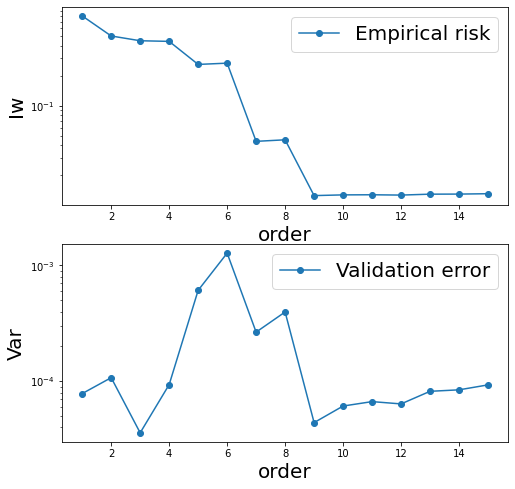

In [90]:
 # Enter your code here to plot (using semilogy) Iw and Var versus model order N.
fig, ax = plt.subplots(2,1,figsize=(8,8))
ax[0].plot(range(1,16),Iw, 'o-')
ax[0].set_xlabel('order', fontsize=20)
ax[0].set_ylabel('Iw', fontsize=20)
ax[0].legend(['Empirical risk'], fontsize=20)
ax[0].set_yscale("log")

ax[1].plot(range(1,16),Var, 'o-')
ax[1].set_xlabel('order', fontsize=20)
ax[1].set_ylabel('Var', fontsize=20)
ax[1].legend(['Validation error'], fontsize=20)
ax[1].set_yscale("log")